In [50]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [7]:
!mkdir pan_card_tampering pan_card_tampering\image

In [11]:
original = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)
tampered = Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png", stream=True).raw)

In [14]:
print("Original Format:", original.format)
print("Tampered Format:", tampered.format)

print("Original Size:", original.size)
print("Tampered Size:", tampered.size)

Original Format: JPEG
Tampered Format: PNG
Original Size: (1200, 800)
Tampered Size: (282, 179)


In [17]:
# resize image
original = original.resize((250, 160))
print(original.size)
original.save("pan_card_tampering/image/original.png")

tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png")

(250, 160)
(250, 160)


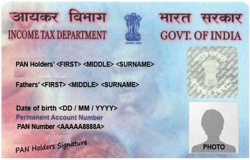

In [19]:
original

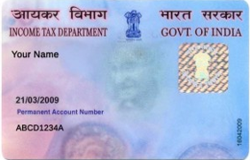

In [21]:
tampered

In [24]:
original = cv2.imread("pan_card_tampering/image/original.png")
tampered = cv2.imread("pan_card_tampering/image/tampered.png")

In [27]:
original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_RGB2GRAY)

In [42]:
score, difference = structural_similarity(original_gray, tampered_gray, full=True)
difference = (difference * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3210803177184475


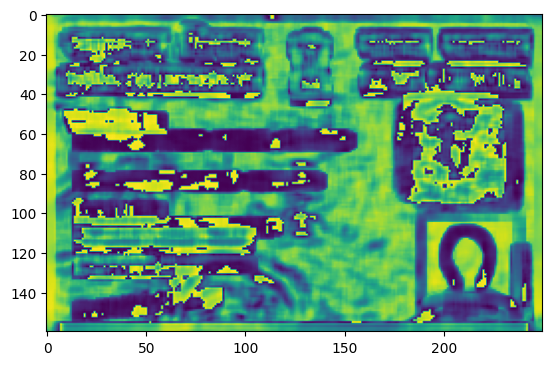

In [63]:
plt.imshow(difference)
plt.show()

In [61]:
thresh = cv2.threshold(difference, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [66]:
for c in cnts:
    # applying contours on image
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original


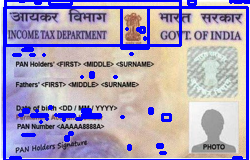

In [69]:
print("Original")
Image.fromarray(original)

Tempered


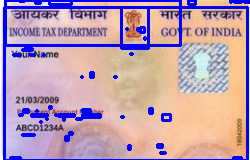

In [71]:
print("Tempered")
Image.fromarray(tampered)

Difference


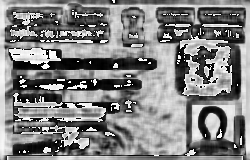

In [73]:
print("Difference")
Image.fromarray(difference)

Threshold


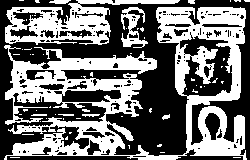

In [75]:
print("Threshold")
Image.fromarray(thresh)